In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/selected_M_best5.csv")
df = df.drop_duplicates()
print(df.head())

   Glucose  SkinThickness  Insulin   BMI   Age  Results
0    138.0           35.0      0.0  33.6  47.0        1
1     84.0           31.0    125.0  38.2  23.0        0
2    145.0            0.0      0.0  44.2  31.0        1
3    135.0           42.0    250.0  42.3  24.0        1
4    139.0           41.0    480.0  40.7  21.0        0


In [3]:
df.describe()

,Glucose,SkinThickness,Insulin,BMI,Age,Results
count,744.000000,744.000000,744.000000,744.000000,744.000000,746.000000
mean,120.892473,20.908602,79.534946,32.229704,33.142473,0.332440
std,31.943115,16.311726,111.745897,8.206319,11.751286,0.471404
min,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,99.000000,0.000000,0.000000,27.400000,24.000000,0.000000
50%,117.000000,23.000000,36.000000,32.300000,29.000000,0.000000
75%,140.250000,32.000000,130.000000,36.800000,40.250000,1.000000
max,199.000000,110.000000,744.000000,80.600000,81.000000,1.000000


In [4]:
df_features = list(df.columns)
print(df_features)

['Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Results']


In [5]:
print((df[df_features]==0).sum())
print((df[df_features]=="NaN").sum())

Glucose            5
SkinThickness    215
Insulin          359
BMI               10
Age                0
Results          498
dtype: int64
Glucose          0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Results          0
dtype: int64


In [6]:
#print((df[X.columns]).isNull().sum())
print(df[df_features].isnull().sum())
print(df.shape)
df = df.dropna(axis = 0)
print(df.shape)
#print(X)

Glucose          2
SkinThickness    2
Insulin          2
BMI              2
Age              2
Results          0
dtype: int64
(746, 6)
(744, 6)


In [7]:

# temp = df[df['BloodPressure']!=0.000000]
# df['BloodPressure'] = df['BloodPressure'].replace( 0.000000 , temp.mean()[0])

# temp = df[df['Glucose']!=0.000000]
# df['Glucose'] = df['Glucose'].replace( 0.000000 , temp.mean()[0])

# temp = df[df['BMI']!=0.000000]
# df['BMI'] = df['BMI'].replace( 0.000000 , temp.mean()[0])


print((df[df_features]==0).sum())


Glucose            5
SkinThickness    215
Insulin          359
BMI               10
Age                0
Results          497
dtype: int64


In [8]:
print(df.max())

Glucose          199.0
SkinThickness    110.0
Insulin          744.0
BMI               80.6
Age               81.0
Results            1.0
dtype: float64


In [9]:
print(df.min())

Glucose           0.0
SkinThickness     0.0
Insulin           0.0
BMI               0.0
Age              21.0
Results           0.0
dtype: float64


In [10]:
print(df.max() - df.min())

Glucose          199.0
SkinThickness    110.0
Insulin          744.0
BMI               80.6
Age               60.0
Results            1.0
dtype: float64


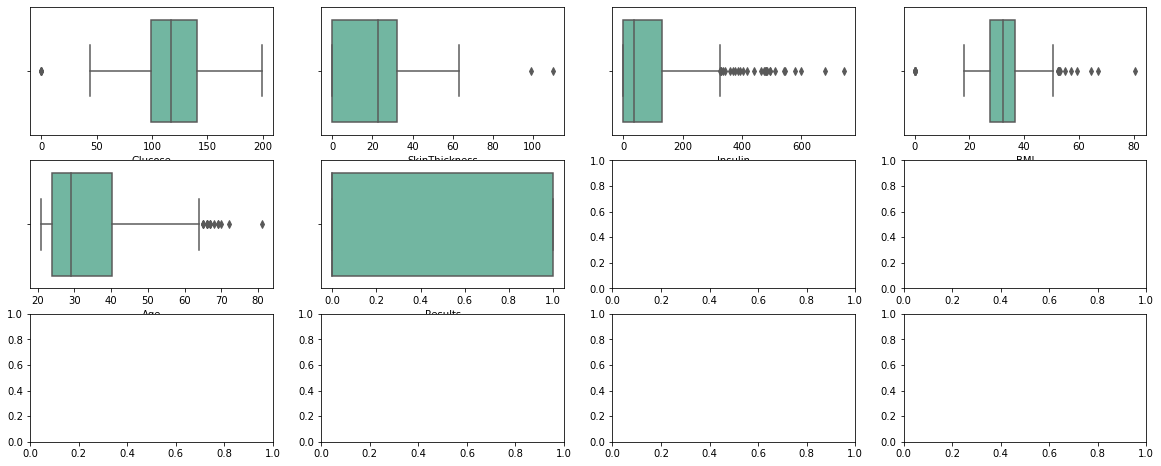

In [11]:
fig, axes = plt.subplots(3,4, figsize=(20,8))
x_,y_ = 0,0
for i, column in enumerate(df.columns[:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    else:
        y_ += 1

In [12]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_01 = pd.DataFrame(data=dat, columns=cols)  
print(df_01.head())

Index(['Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Results'], dtype='object')
    Glucose  SkinThickness   Insulin       BMI       Age  Results
0  0.693467       0.318182  0.000000  0.416873  0.433333      1.0
1  0.422111       0.281818  0.168011  0.473945  0.033333      0.0
2  0.728643       0.000000  0.000000  0.548387  0.166667      1.0
3  0.678392       0.381818  0.336022  0.524814  0.050000      1.0
4  0.698492       0.372727  0.645161  0.504963  0.000000      0.0


In [13]:
print(df_01.max() - df_01.min())

Glucose          1.0
SkinThickness    1.0
Insulin          1.0
BMI              1.0
Age              1.0
Results          1.0
dtype: float64


In [14]:
x = df_01.drop(["Results"], axis =1);
y = df_01["Results"]
print(y.value_counts())

0.0    497
1.0    247
Name: Results, dtype: int64


(array([497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 247.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

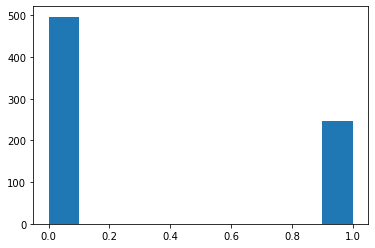

In [15]:
plt.hist(y)

0.0    274
1.0    247
Name: Results, dtype: int64


(array([274.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 247.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

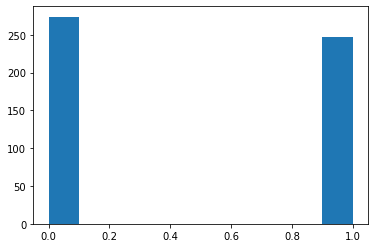

In [16]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.9, random_state=0)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0.0    274
1.0    274
Name: Results, dtype: int64


(array([274.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 274.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

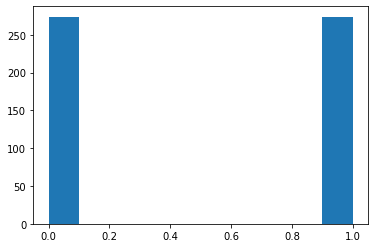

In [17]:
smt = SMOTE(random_state=0)
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [18]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  59.672
Standed deviation :  0.912
CV value :  3
Parameters :  {}
Accuracy :  56.027
Standed deviation :  2.149
CV value :  4
Parameters :  {}
Accuracy :  58.942
Standed deviation :  5.171
CV value :  5
Parameters :  {}
Accuracy :  60.047
Standed deviation :  6.087


In [19]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 40}
Accuracy :  65.876
Standed deviation :  2.007
CV value :  3
Parameters :  {'random_state': 3}
Accuracy :  66.592
Standed deviation :  6.570
CV value :  4
Parameters :  {'random_state': 4}
Accuracy :  64.416
Standed deviation :  4.237
CV value :  5
Parameters :  {'random_state': 20}
Accuracy :  65.490
Standed deviation :  6.170


In [20]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 17}
Accuracy :  64.416
Standed deviation :  3.102
CV value :  3
Parameters :  {'n_neighbors': 17}
Accuracy :  66.230
Standed deviation :  4.382
CV value :  4
Parameters :  {'n_neighbors': 17}
Accuracy :  64.781
Standed deviation :  2.089
CV value :  5
Parameters :  {'n_neighbors': 17}
Accuracy :  65.129
Standed deviation :  6.650


In [21]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  65.511
Standed deviation :  5.657
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  65.314
Standed deviation :  5.846
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  65.328
Standed deviation :  4.991
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  65.113
Standed deviation :  8.264


In [22]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  47.628
Standed deviation :  1.642
CV value :  3
Parameters :  {}
Accuracy :  49.453
Standed deviation :  0.669
CV value :  4
Parameters :  {}
Accuracy :  47.263
Standed deviation :  2.024
CV value :  5
Parameters :  {}
Accuracy :  50.717
Standed deviation :  3.501


In [23]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'poly'}
Accuracy :  65.146
Standed deviation :  5.292
CV value :  3
Parameters :  {'kernel': 'linear'}
Accuracy :  65.129
Standed deviation :  7.244
CV value :  4
Parameters :  {'kernel': 'linear'}
Accuracy :  65.511
Standed deviation :  5.544
CV value :  5
Parameters :  {'kernel': 'poly'}
Accuracy :  64.937
Standed deviation :  6.846


In [24]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 300, 'max_features': 2, 'n_estimators': 100}
Accuracy :  65.328
Standed deviation :  4.015
CV value :  3
Parameters :  {'max_depth': 150, 'max_features': 3, 'n_estimators': 100}
Accuracy :  65.493
Standed deviation :  7.195
CV value :  4
Parameters :  {'max_depth': 90, 'max_features': 2, 'n_estimators': 100}
Accuracy :  65.693
Standed deviation :  3.722
CV value :  5
Parameters :  {'max_depth': 300, 'max_features': 2, 'n_estimators': 100}
Accuracy :  64.572
Standed deviation :  6.592
